# 다중 회귀 - 보스톤 주택 가격

In [1]:
import numpy as np


In [3]:
import pandas as pd

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()

In [108]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["PRICE"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도 와 선형회귀선 : sesborn.regplot()

In [15]:
features = df.columns[1:-1]
print(features)

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


<AxesSubplot:xlabel='CRIM', ylabel='PRICE'>

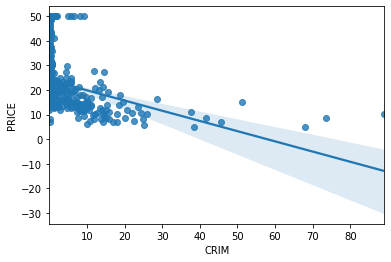

In [157]:
sns.regplot(x='CRIM',y='PRICE',data=df)

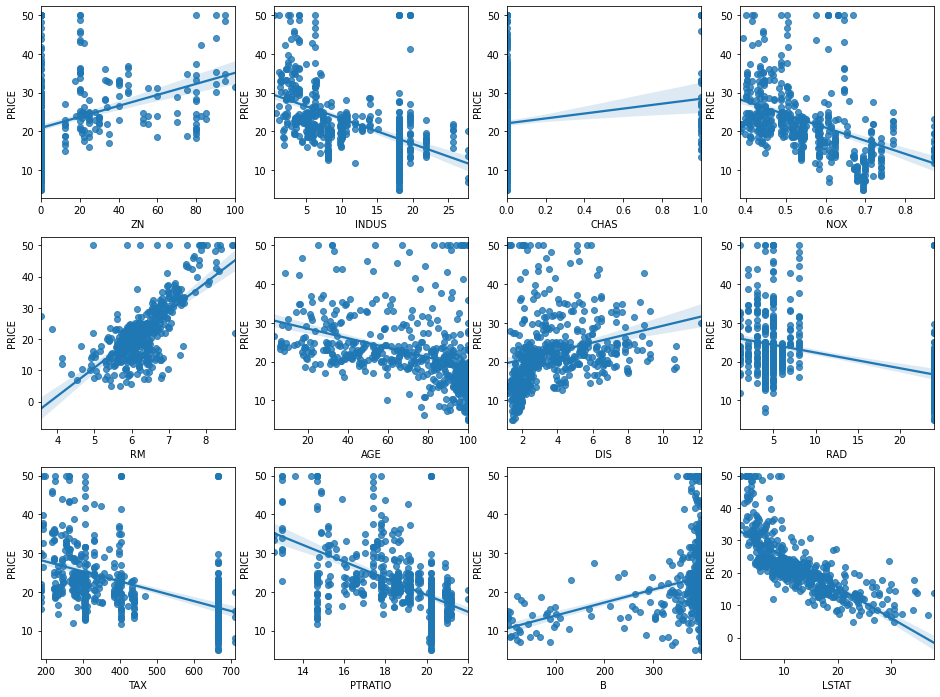

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(features):
    row, col = i//4 , i%4
    sns.regplot(x=feature,y='PRICE',data=df,ax=axs[row][col]) 

- 어떤 feature가 가격과 상관관계가 높을까?

In [34]:
from sklearn.linear_model import LinearRegression

In [156]:
for i in range(len(df.columns)-1):
    y = boston.target
    X = boston.data[:,[i]]
    lr = LinearRegression()
    print(df.columns[i],lr.fit(X,y),lr.score(X,y))


CRIM LinearRegression() 0.15078046904975717
ZN LinearRegression() 0.12992084489428946
INDUS LinearRegression() 0.2339900304444752
CHAS LinearRegression() 0.03071612970877491
NOX LinearRegression() 0.182603042501699
RM LinearRegression() 0.48352545599133423
AGE LinearRegression() 0.14209474407780442
DIS LinearRegression() 0.062464372121782574
RAD LinearRegression() 0.14563857991232532
TAX LinearRegression() 0.2195259210442193
PTRATIO LinearRegression() 0.257847318009223
B LinearRegression() 0.11119611824636277
LSTAT LinearRegression() 0.5441462975864799


In [91]:
for feature in features:
    x =df[[feature]]
    print(feature,lr.fit(X,y),lr.score(X,y))


ZN LinearRegression() 0.5441462975864799
INDUS LinearRegression() 0.5441462975864799
CHAS LinearRegression() 0.5441462975864799
NOX LinearRegression() 0.5441462975864799
RM LinearRegression() 0.5441462975864799
AGE LinearRegression() 0.5441462975864799
DIS LinearRegression() 0.5441462975864799
RAD LinearRegression() 0.5441462975864799
TAX LinearRegression() 0.5441462975864799
PTRATIO LinearRegression() 0.5441462975864799
B LinearRegression() 0.5441462975864799
LSTAT LinearRegression() 0.5441462975864799


In [155]:
y = boston.target
lr = LinearRegression()

# features 복수 단수 신경써서 
for feature in boston.feature_names:
    X =df[[feature]]
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [120]:
X = boston.data
y =boston.target

In [121]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [123]:
lr.coef_,lr.intercept_

(array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]),
 36.459488385089855)

<pre>
PRICE = 
- 0.108 * CRIM 
+ 0.046 * ZN + 0.021 * INDUS + 2.69 * CHAS 
- 0.178 * NOX + 3.81 * RM + 0.00069 * AGE 
- 1.48 * DIS + 0.306 * RAD - 0.012 * TAX 
- 0.953 * PRTATIO + 0.00931 * B
- 0.525 * LSTAT + 36.46
</pre>

In [125]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [133]:
# 기울기와 절편을 이용한 예측값
np.dot(lr.coef_,boston.data[0]) + lr.intercept_

30.003843377016814

In [137]:
# 실제값
boston.target[0]

24.0

In [144]:
# 5개 데이터에 대한 예측값 및 실제값
for i in range(5):
    pred = np.dot(lr.coef_,boston.data[i]) + lr.intercept_
    print(f'예측값: {pred:.2f}, 실제값: {boston.target[i]}')

예측값: 30.00, 실제값: 24.0
예측값: 25.03, 실제값: 21.6
예측값: 30.57, 실제값: 34.7
예측값: 28.61, 실제값: 33.4
예측값: 27.94, 실제값: 36.2


In [148]:
lr.predict(boston.data[:5])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [149]:
lr.predict(boston.data[[0]])

array([30.00384338])

In [152]:
lr.predict(boston.data[0:1])

array([30.00384338])

In [153]:
lr.predict(boston.data[0].reshape(1,-1))

array([30.00384338])

In [154]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
